# Exercise 3.1

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import pandas as pd

In [11]:
def sample_xN(M, N):
    xN_samples = np.array([])
    for i in range(M):
        # draw samples from uniform distribution
        xi = np.random.uniform(low=0, high=1, size=N)
        xi = np.where(xi > 0.5, 1, -1)
        # compute xN
        xN = 1/np.sqrt(N)*np.sum(xi)
        xN_samples = np.append(xN_samples, xN)
    return xN_samples

sample_xN(10,2)

array([-1.41421356,  0.        ,  1.41421356,  0.        , -1.41421356,
        1.41421356,  0.        ,  0.        ,  0.        ,  1.41421356])

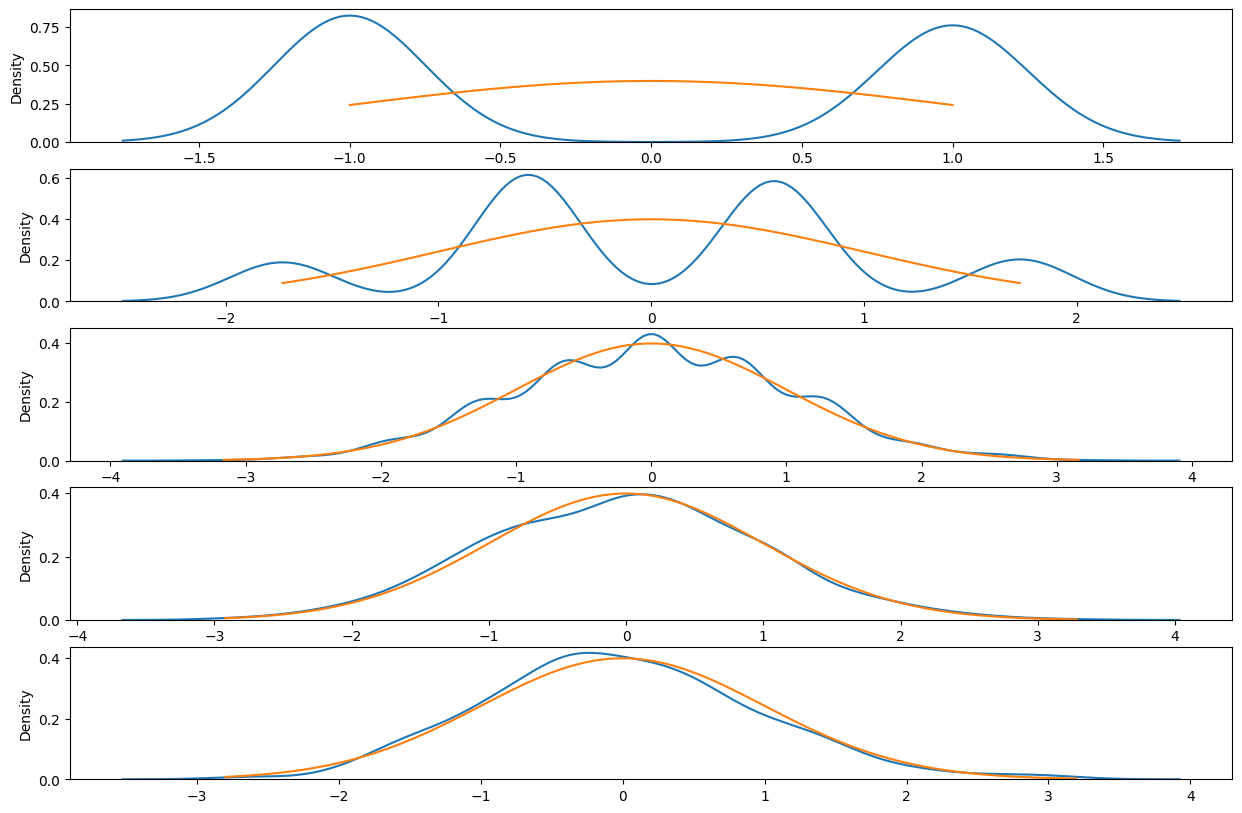

In [26]:
# density estimation
from sklearn.neighbors import KernelDensity
Ns = [1, 3, 10, 30, 100]
M = 1000


# Prepare the plot layout, ensuring enough subplots for all problem sizes
fig, axes = plt.subplots(nrows=len(Ns), ncols=1, figsize=(15, 10))  # Adjusted figure size

# Flatten axes array for simpler iteration
axes = axes.flatten()

for (N, ax) in zip(Ns, axes):
    samples = sample_xN(M, N)
    sns.kdeplot(samples, ax=ax)
    x_range = np.linspace(samples.min(), samples.max(), 100)
    ax.plot(x_range, scipy.stats.norm.pdf(x_range))

# Exercise 3.2

In [35]:
df = pd.read_csv("temperature_data_processed.csv")
# convert date to string for easier handling
df["date"] = df["date"].astype(str)
df.dtypes
df["year"] = df["date"].str[:4].astype(int)
df["month"] = df["date"].str[4:6].astype(int)
df["day"] = df["date"].str[6:8].astype(int)
# drop missing values
df = df[df["temp"] > -999]
df.head()

,stationid,temp,date,time,year,month,day
0,3,-5.6,18910101,7,1891,1,1
1,3,-0.7,18910101,14,1891,1,1
2,3,-4.0,18910101,21,1891,1,1
3,3,-5.2,18910102,7,1891,1,2
4,3,-1.0,18910102,14,1891,1,2


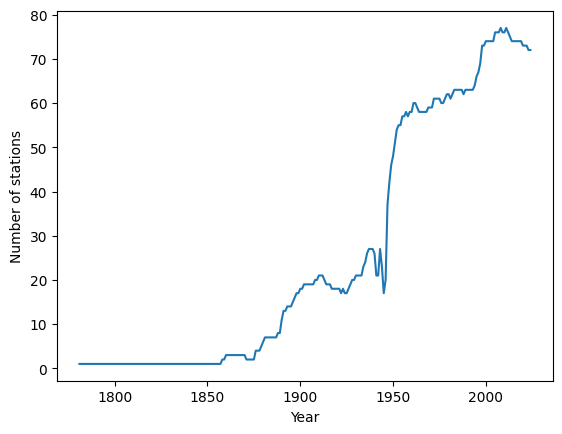

In [49]:
# count station ids per year
n_stations = df.groupby("year")["stationid"].nunique().reset_index()

plt.figure()
plt.xlabel("Year")
plt.ylabel("Number of stations")
plt.plot(n_stations["year"], n_stations["stationid"])

In [52]:
stations_1900 = df[df["year"] == 1900]["stationid"].unique()
stations_2020 = df[df["year"] == 2020]["stationid"].unique()
ref_stat = list(set(stations_1900).intersection(set(stations_2020)))
ref_stat

[5792, 4104, 1358, 3631, 880, 4625, 722, 691, 1684, 2290, 3126, 3987, 1757]

In [54]:
df_filtered = df[df["stationid"].isin(ref_stat) &
                 df["year"].isin([1900, 2020]) &
                 df["month"].isin([5,6,7]) &
                 df["time"].isin([12, 14])]

In [55]:
df_filtered

,stationid,temp,date,time,year,month,day
807943,691,11.6,19000501,14,1900,5,1
807946,691,14.8,19000502,14,1900,5,2
807949,691,22.4,19000503,14,1900,5,3
807952,691,16.2,19000504,14,1900,5,4
807955,691,20.8,19000505,14,1900,5,5
...,...,...,...,...,...,...,...
6709738,5792,7.8,20200727,12,2020,7,27
6709741,5792,12.0,20200728,12,2020,7,28
6709744,5792,8.0,20200729,12,2020,7,29
6709747,5792,10.5,20200730,12,2020,7,30
